# Data Processing for Dataset 1 - AI Vs Human Text 

## 1. Load the Dataset

In [2]:
import pandas as pd

# Load the dataset from your local path
df = pd.read_csv('./df1_cleaned.csv')  

# Display the first few rows of the dataset
df.head()


,text,generated,text_length,tokens
0,Cars are a wonderful thing. They are perhaps o...,0.0,871,car wonderful thing perhaps one world greatest...
1,"cars are everywhere these days, and they are c...",0.0,633,car everywhere day commonplace among u getting...
2,"One uses a car to go to thee store, pick someo...",0.0,392,one us car go thee store pick someone even go ...
3,The electoral college ii iomething that hai be...,0.0,493,electoral college ii iomething hai loved hated...
4,"Dear saaae senaaor, My leaaer is in regards ao...",0.0,667,dear saaae senaaor leaaer regard ao changing a...


## 2. Class Distribution

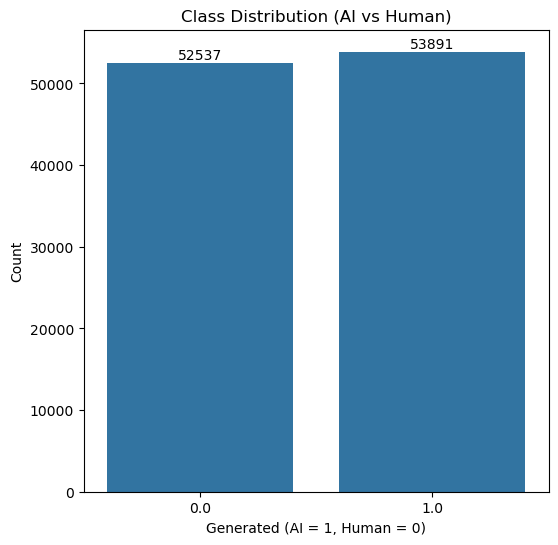

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution with count labels
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='generated', data=df)
plt.title('Class Distribution (AI vs Human)')
plt.xlabel('Generated (AI = 1, Human = 0)')
plt.ylabel('Count')

# Add count labels
for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{count}', (x, y), ha='center', va='bottom')

plt.show()


Comment: the cleaned dataset has a more balanced distribution.

## 3. Text Length Analysis (Tokens)

In [ ]:
# Splitting the token string and count the number of tokens
df['token_length'] = df['tokens'].apply(lambda x: len(x.split()))

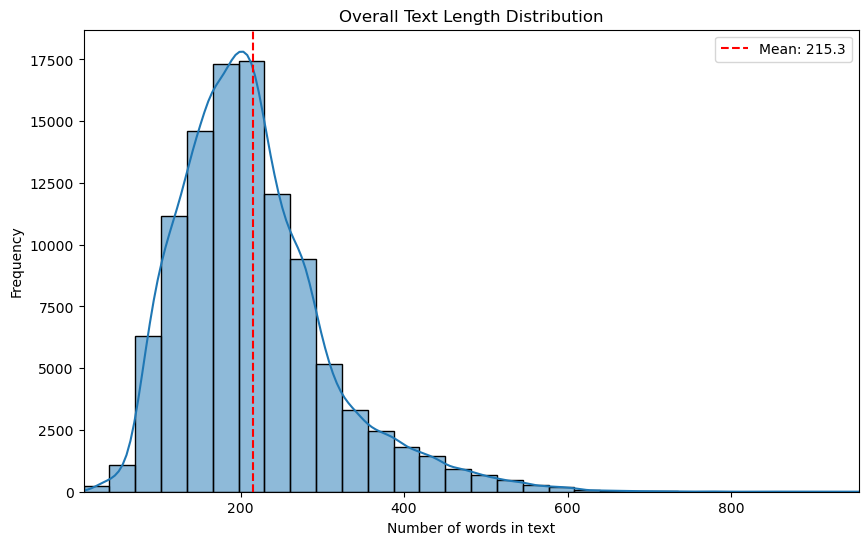

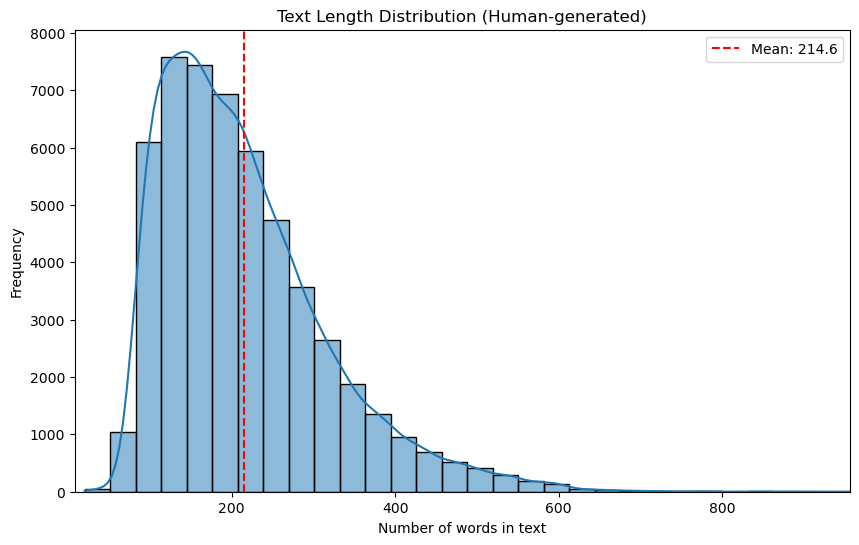

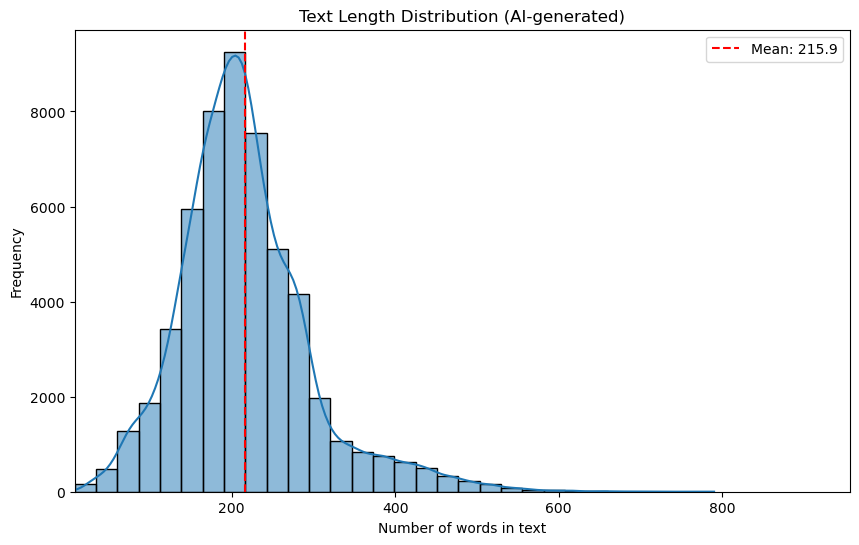

In [7]:
# Shared x-axis range
x_min = df['token_length'].min()
x_max = df['token_length'].max()

# 2) Overall text length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['token_length'], kde=True, bins=30)
plt.axvline(df['token_length'].mean(), color='red', linestyle='--', label=f"Mean: {df['token_length'].mean():.1f}")
plt.title('Overall Text Length Distribution')
plt.xlabel('Number of words in text')
plt.ylabel('Frequency')
plt.xlim(x_min, x_max)
plt.legend()
plt.show()

# 3) Human-generated text length distribution
human_texts = df[df['generated'] == 0]['token_length']
plt.figure(figsize=(10, 6))
sns.histplot(human_texts, kde=True, bins=30)
plt.axvline(human_texts.mean(), color='red', linestyle='--', label=f"Mean: {human_texts.mean():.1f}")
plt.title('Text Length Distribution (Human-generated)')
plt.xlabel('Number of words in text')
plt.ylabel('Frequency')
plt.xlim(x_min, x_max)
plt.legend()
plt.show()

# 4) AI-generated text length distribution
ai_texts = df[df['generated'] == 1]['token_length']
plt.figure(figsize=(10, 6))
sns.histplot(ai_texts, kde=True, bins=30)
plt.axvline(ai_texts.mean(), color='red', linestyle='--', label=f"Mean: {ai_texts.mean():.1f}")
plt.title('Text Length Distribution (AI-generated)')
plt.xlabel('Number of words in text')
plt.ylabel('Frequency')
plt.xlim(x_min, x_max)
plt.legend()
plt.show()

C:\Users\Dayso\AppData\Local\Temp\ipykernel_40848\1845824503.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='generated', y='token_length', data=df, inner='box', palette='Set2')


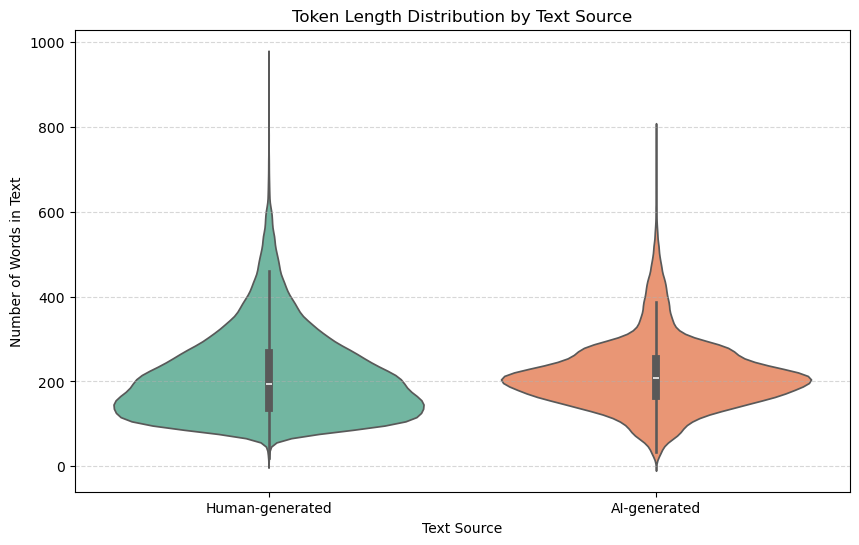

In [8]:
# Violin plot for token length distributions by source
plt.figure(figsize=(10, 6))
sns.violinplot(x='generated', y='token_length', data=df, inner='box', palette='Set2')

# Customize x-axis labels: 0 → Human, 1 → AI
plt.xticks([0, 1], ['Human-generated', 'AI-generated'])

plt.title('Token Length Distribution by Text Source')
plt.xlabel('Text Source')
plt.ylabel('Number of Words in Text')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

Comment: the text-length distribution of AI text is more balance while the human text is skewed.

## 4. Vocabulary Richness - TTR

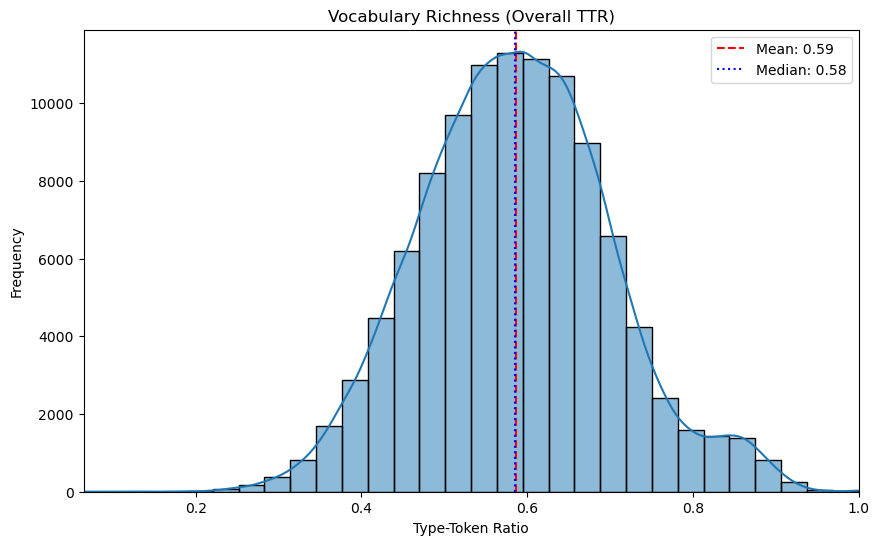

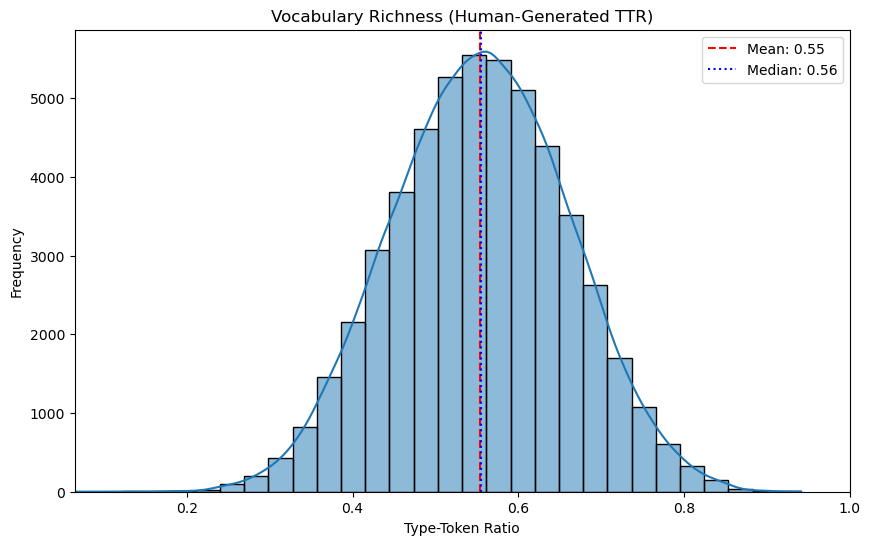

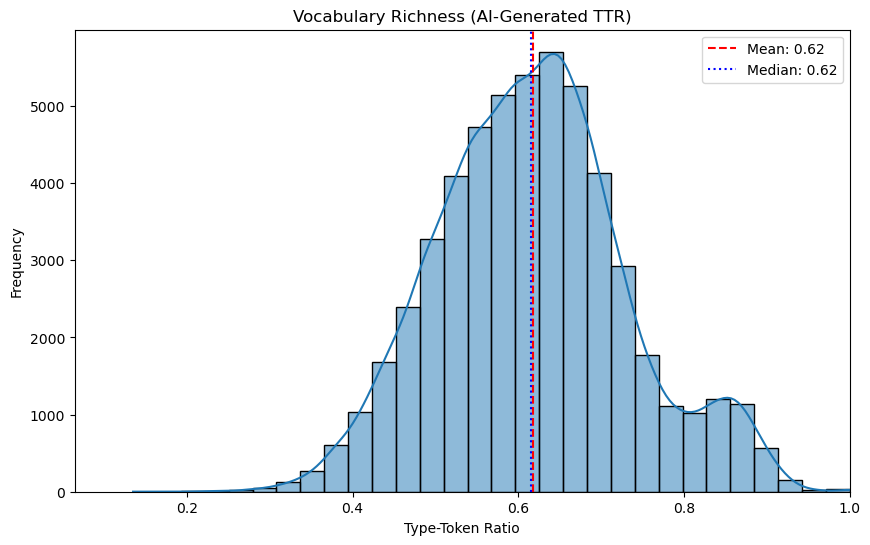

In [9]:
# Calculate TTR: number of unique tokens / total number of tokens
df['ttr'] = df['tokens'].apply(
    lambda x: len(set(str(x).split())) / len(str(x).split()) if len(str(x).split()) > 0 else 0
)

# Determine common x-axis limits
x_min = df['ttr'].min()
x_max = df['ttr'].max()

# 1. Overall TTR Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['ttr'], kde=True, bins=30)
plt.title('Vocabulary Richness (Overall TTR)')
plt.xlabel('Type-Token Ratio')
plt.ylabel('Frequency')
plt.xlim(x_min, x_max)
plt.axvline(df['ttr'].mean(), color='red', linestyle='--', label=f"Mean: {df['ttr'].mean():.2f}")
plt.axvline(df['ttr'].median(), color='blue', linestyle=':', label=f"Median: {df['ttr'].median():.2f}")
plt.legend()
plt.show()

# 2. Human-generated TTR Distribution
human_ttr = df[df['generated'] == 0]['ttr']
plt.figure(figsize=(10, 6))
sns.histplot(human_ttr, kde=True, bins=30)
plt.title('Vocabulary Richness (Human-Generated TTR)')
plt.xlabel('Type-Token Ratio')
plt.ylabel('Frequency')
plt.xlim(x_min, x_max)
plt.axvline(human_ttr.mean(), color='red', linestyle='--', label=f"Mean: {human_ttr.mean():.2f}")
plt.axvline(human_ttr.median(), color='blue', linestyle=':', label=f"Median: {human_ttr.median():.2f}")
plt.legend()
plt.show()

# 3. AI-generated TTR Distribution
ai_ttr = df[df['generated'] == 1]['ttr']
plt.figure(figsize=(10, 6))
sns.histplot(ai_ttr, kde=True, bins=30)
plt.title('Vocabulary Richness (AI-Generated TTR)')
plt.xlabel('Type-Token Ratio')
plt.ylabel('Frequency')
plt.xlim(x_min, x_max)
plt.axvline(ai_ttr.mean(), color='red', linestyle='--', label=f"Mean: {ai_ttr.mean():.2f}")
plt.axvline(ai_ttr.median(), color='blue', linestyle=':', label=f"Median: {ai_ttr.median():.2f}")
plt.legend()
plt.show()


Comment: AI texts have a higher TTR than human texts.

## 5. Other Feature Engineering 

- Average Sentence Length 

- Hapax Ratio: number of tokens that appears once / total number of tokens

- Flesch-Kincaid: readability

In [10]:
import textstat, re, numpy as np
import nltk
from collections import Counter

# Average sentence length
def avg_sent_len(text):
    sents = nltk.sent_tokenize(text)
    return np.mean([len(nltk.word_tokenize(s)) for s in sents]) if sents else 0

# Hapax ratio
def hapax_ratio(tokens):
    counts = Counter(tokens.split())
    hapax = sum(1 for c in counts.values() if c == 1)
    return hapax / len(tokens.split()) if tokens else 0

# Flesch-Kincaid
def flesch_grade(text):
    try:
        return textstat.flesch_kincaid_grade(text)
    except:   # short texts may error
        return 0


In [12]:
# for parallel processing
from joblib import Parallel, delayed
import multiprocessing
num_cores = multiprocessing.cpu_count()
num_cores

32

In [13]:
# Parallel for avg_sent_len
df['avg_sent_len'] = Parallel(n_jobs=num_cores)(
    delayed(avg_sent_len)(text) for text in df['text']
)

# Parallel for hapax_ratio
df['hapax_ratio'] = Parallel(n_jobs=num_cores)(
    delayed(hapax_ratio)(tokens) for tokens in df['tokens']
)

# Parallel for flesch_grade
df['flesch_grade'] = Parallel(n_jobs=num_cores)(
    delayed(flesch_grade)(text) for text in df['text']
)

In [14]:
df.head()

,text,generated,text_length,tokens,token_length,ttr,avg_sent_len,hapax_ratio,flesch_grade
0,Cars are a wonderful thing. They are perhaps o...,0.0,871,car wonderful thing perhaps one world greatest...,470,0.497872,19.300000,0.317021,7.904784
1,"cars are everywhere these days, and they are c...",0.0,633,car everywhere day commonplace among u getting...,380,0.544737,19.388889,0.357895,8.844641
2,"One uses a car to go to thee store, pick someo...",0.0,392,one us car go thee store pick someone even go ...,251,0.561753,16.814815,0.390438,7.509796
3,The electoral college ii iomething that hai be...,0.0,493,electoral college ii iomething hai loved hated...,262,0.538168,21.880000,0.366412,9.325487
4,"Dear saaae senaaor, My leaaer is in regards ao...",0.0,667,dear saaae senaaor leaaer regard ao changing a...,467,0.423983,18.500000,0.265525,7.967523


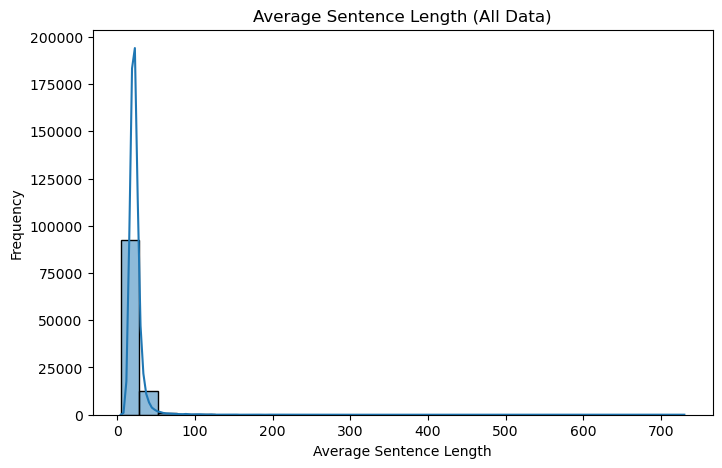

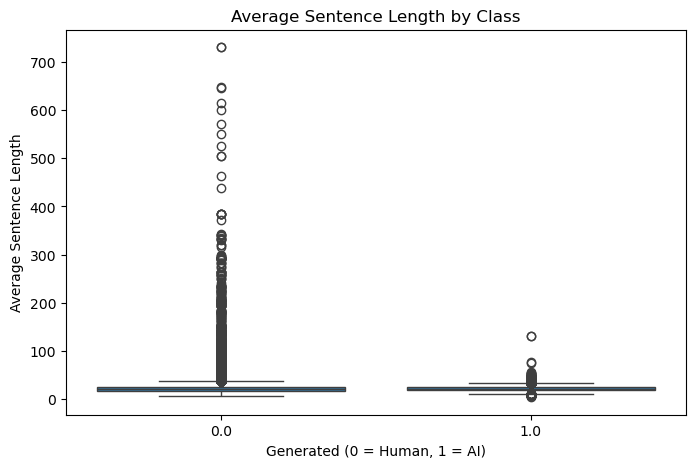

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(df['avg_sent_len'], kde=True, bins=30)
plt.title("Average Sentence Length (All Data)")
plt.xlabel("Average Sentence Length")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='generated', y='avg_sent_len')
plt.title("Average Sentence Length by Class")
plt.xlabel("Generated (0 = Human, 1 = AI)")
plt.ylabel("Average Sentence Length")
plt.show()


Comment: There are more outliers in human sentences while the average sentence lengths of AI samples are more consistent. 

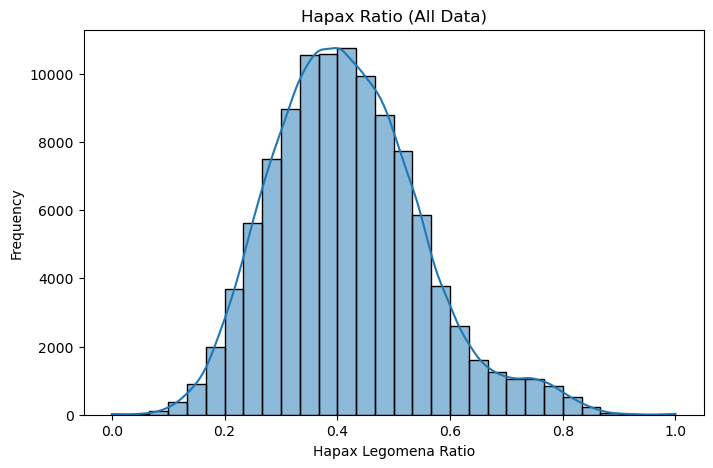

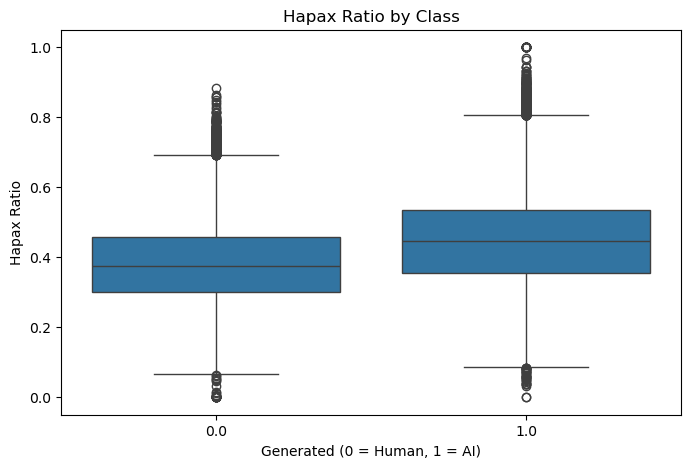

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(df['hapax_ratio'], kde=True, bins=30)
plt.title("Hapax Ratio (All Data)")
plt.xlabel("Hapax Legomena Ratio")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='generated', y='hapax_ratio')
plt.title("Hapax Ratio by Class")
plt.xlabel("Generated (0 = Human, 1 = AI)")
plt.ylabel("Hapax Ratio")
plt.show()


Comment: AI samples score higher Hapax Ratio than human samples, meaning AI tend to use a wider variety of words.

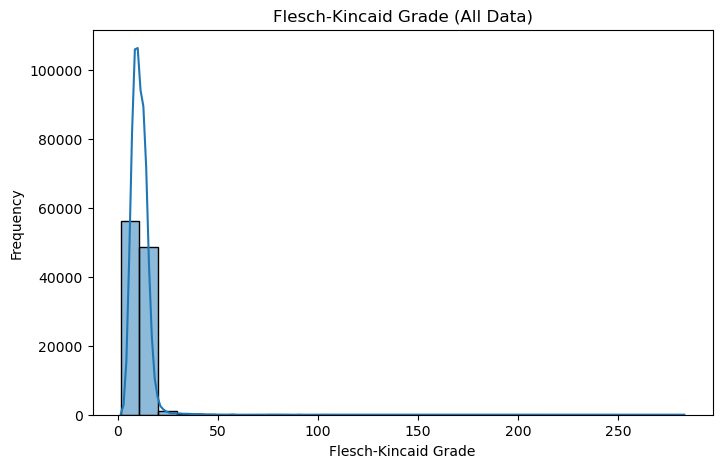

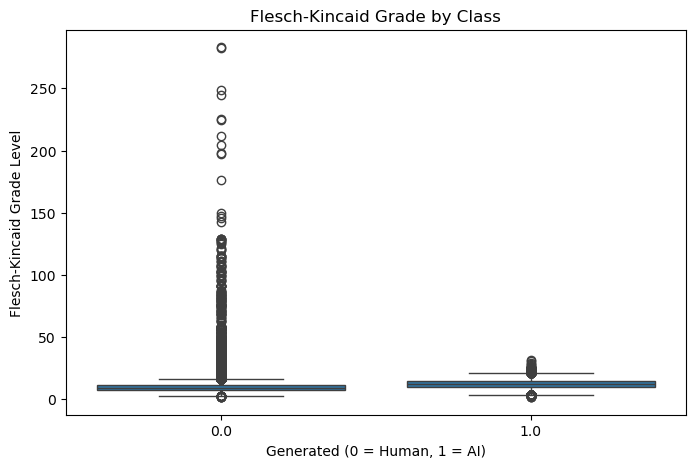

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df['flesch_grade'], kde=True, bins=30)
plt.title("Flesch-Kincaid Grade (All Data)")
plt.xlabel("Flesch-Kincaid Grade")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='generated', y='flesch_grade')
plt.title("Flesch-Kincaid Grade by Class")
plt.xlabel("Generated (0 = Human, 1 = AI)")
plt.ylabel("Flesch-Kincaid Grade Level")
plt.show()


Comment: Very similar readability scores while there are outliers in human samples. In general, human text are more readable than AI samples.

## 6. Correlation

Calculates correlation scores between the label and the engineered features 

In [18]:
features = ['text_length', 'token_length', 'ttr', 'avg_sent_len', 'hapax_ratio', 'flesch_grade']
from scipy.stats import pointbiserialr
import pandas as pd

correlations = {}

for feature in features:
    corr, p = pointbiserialr(df['generated'], df[feature])
    correlations[feature] = {'correlation': corr, 'p_value': p}

# Convert to DataFrame for easy viewing
corr_df = pd.DataFrame.from_dict(correlations, orient='index')
corr_df = corr_df.sort_values('correlation', ascending=False)
print(corr_df)


              correlation        p_value
ttr              0.273550   0.000000e+00
hapax_ratio      0.271177   0.000000e+00
flesch_grade     0.204304   0.000000e+00
token_length     0.006814   2.621273e-02
text_length     -0.085632  2.338369e-172
avg_sent_len    -0.101335  6.933210e-241


Comment: `ttr`, `hapax_ratio` and `flesch_grade` have high correlation scores, ranging from 0.2 to 0.27. They are not really strong predictors themselves but in combination, they might help with prediction.

## 7. Save the Dataset

In [19]:
df.to_csv("df1_cleaned_processed.csv", index=False)

In [20]:
df.shape

(106428, 9)